# Missed events in the simple two state case
(Blue Book, 1995, page 455)

###### Some general notebook setting

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt

In [97]:
from math import exp
import numpy as np

### The Two-State Case

Asumption: the true open times and shut times follow simple exponential distribution. 

Then we have $P(\textrm{shut time} > \tau_s) = e^{-\tau_s/m_s} \tag{Eq 117}$

and $\textrm{Mean number of openings per apparent opening} = 1 / e^{-\tau_s/m_s} = e^{\tau_s/m_s} \tag{Eq 118}$

where $\tau_o$ and $\tau_s$ - resolution for openings and for shuttings, respectively;  $m_o$ and $m_s$ - the observed (apparent) mean open and shut times, respectively.

For an exponential distribution

$\textrm{Mean length of shuttings longer than } \tau_s = \tau_s + m_s \tag{Eq 119}$

then

$\textrm{Mean of shuttings less than } \tau_s = \lbrack m_s - (\tau_s + m_s)e^{-\tau_s/m_s}\rbrack / (1 - e^{-\tau_s/m_s}) \tag{Eq 119}$

It can be derived (derivation is in the book), that the observed (apparent) mean open, $^{e}m_o$, and shut, $^{e}m_s$, times,

$^{e}m_o = \tau_o + (m_o + m_s)e^{\tau_s/m_s} - (\tau_s + m_s) \tag{Eq 121}$

and

$^{e}m_s = \tau_s + (m_o + m_s)e^{\tau_o/m_o} - (\tau_o + m_o) \tag{Eq 122}$                       

The values of $^{e}m_o$ and $^{e}m_s$ can be estimated from the data by averaging the observed open and shut times; $\tau_o$ and $\tau_s$ are known, so the equations 121 and 122 are a pair of nonlinear simultaneous equations that can be solved numerically from the true means $m_o$ and $m_s$.

### Solving equations in Python

Define resolution for openings, $\tau_o$, resolution for shuttings, $\tau_s$, and the observed (apparent) mean open, $^{e}m_o$, and shut, $^{e}m_s$, times:

In [98]:
tro, trs = 0.2, 0.2
emo, ems = 0.6, 2.0

In [99]:
#Write equations to solve
def equations(p, tro, trs, emo, ems):
    mo, ms = p
    return (tro + (mo + ms) * exp(trs / ms) - (ms + trs) - emo, 
            trs + (mo + ms) * exp(tro / mo) - (mo + tro) - ems)

In [100]:
# Use SciPy non-linear equation solver
from scipy.optimize import fsolve
mo, ms =  fsolve(equations, (0.1, 1), args=(tro, trs, emo, ems))
print ('corrected mean open time = ', mo, 
       '\ncorrected mean shut time = ', ms)
# let's save these values for later

corrected mean open time =  0.298988627348 
corrected mean shut time =  0.878692707661


### Equations have two solutions

Note that different starting guess gives a different solution.

In [101]:
mo, ms =  fsolve(equations, (0.01, 0.01), args=(tro, trs, emo, ems))
print ('corrected mean open time = ', mo, 
       '\ncorrected mean shut time = ', ms)
# let's save these values for later

corrected mean open time =  0.106337480902 
corrected mean shut time =  0.214810348765


It turns out that these equations usually have two pairs, 'slow' and 'fast', of solutions.

Let's see what that means graphically. Use the equations 121 and 122 to express true mean times.

$m_o$ as function of $m_s$:

$m_o(m_s)= (^em_o + m_s - \tau_o + \tau_s) e^{-\tau_s/m_s}-m_s$

and $m_s$ as function of $m_o$:

$m_s(m_o)= (^em_s + m_o - \tau_s + \tau_o) e^{-\tau_o/m_o}-m_o$

In [102]:
# In Python these functions:
def fmo1(ms, tro, trs, emo, ems):
    return (emo + ms - tro + trs) * exp(-trs / ms) - ms
def fms1(mo, tro, trs, emo, ems):
    return (ems + mo - trs + tro) * exp(-tro / mo) - mo
fmo = np.vectorize(fmo1)
fms = np.vectorize(fms1)

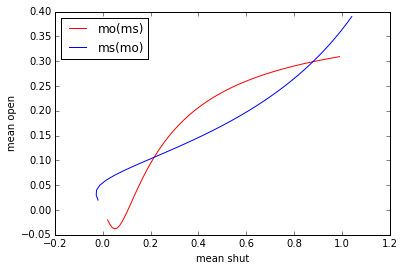

In [103]:
# Plot mo(ms) and ms(mo)
msseq = np.arange(0.02, 1, 0.01)
plt.plot(msseq, fmo(msseq, tro, trs, emo, ems), '-r', label='mo(ms)')
moseq = np.arange(0.02, 0.4, 0.01)
plt.plot(fms(moseq, tro, trs, emo, ems), moseq, '-b', label='ms(mo)')
plt.xlabel('mean shut')
plt.ylabel('mean open')
plt.legend(loc=2)

Both of equations 121 and 122 must be satisfied, so the solution is the point where the two graphs cross. The two crossing points correspond to the two solutions found numerically above.

### Another graphical example with more realistic numbers

In [104]:
# Time in microseconds
tro, trs = 30, 30
emo, ems = 20000, 40

(0, 10)

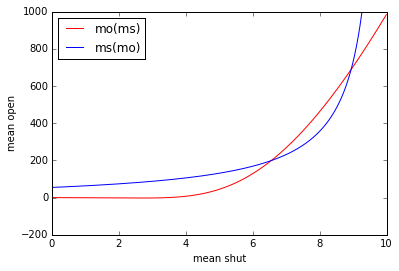

In [105]:
# Plot mo(ms) and ms(mo)
msseq = np.arange(0.02, 10, 0.01)
plt.plot(msseq, fmo(msseq, tro, trs, emo, ems), '-r', label='mo(ms)')
moseq = np.arange(0.1, 1000, 0.01)
plt.plot(fms(moseq, tro, trs, emo, ems), moseq, '-b', label='ms(mo)')
plt.xlabel('mean shut')
plt.ylabel('mean open')
plt.legend(loc=2)
plt.xlim([0, 10])

Try the same example but with $^em_s$ reduced by 1 microsecond!

(0, 10)

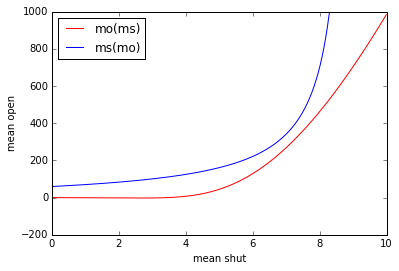

In [106]:
ems = 39
# Plot mo(ms) and ms(mo)
msseq = np.arange(0.02, 10, 0.01)
plt.plot(msseq, fmo(msseq, tro, trs, emo, ems), '-r', label='mo(ms)')
moseq = np.arange(0.1, 1000, 0.01)
plt.plot(fms(moseq, tro, trs, emo, ems), moseq, '-b', label='ms(mo)')
plt.xlabel('mean shut')
plt.ylabel('mean open')
plt.legend(loc=2)
plt.xlim([0, 10])

$^em_s = 40 \mu s$ gives two solutions, but $^em_s = 39 \mu s$ gives no solutions!